# Une climatologie et au lit

## Imports de l'application

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from modules.data_loader import DataSpliter

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Paramètres de l'application

In [32]:
dataset_name = 'temperatures.csv'
filtered_dataset_name = 'filtered_temperatures.csv'
DATA_PATH = 'data/'
DATASET_PATH = DATA_PATH + dataset_name
FILTERED_DATASET_PATH = DATA_PATH + filtered_dataset_name
CURATED_PATH = DATA_PATH + 'curated/'
COUNTRY = CURATED_PATH + 'country/'
REGION = CURATED_PATH + 'region/'

data_spliter = DataSpliter()

## Import et filtrage du dataset général

In [25]:
global_dataset = pd.read_csv(DATASET_PATH, sep=',', encoding='utf-8')
print(dataset_name, "importé avec succès.")
print (global_dataset.info())

temperatures.csv importé avec succès.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB
None


In [26]:
global_dataset[['Region', 'Country', 'State', 'City']] = global_dataset[['Region', 'Country', 'State', 'City']].astype('string')

In [27]:
nancount = global_dataset["Region"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Region\'.")
nancount = global_dataset["Country"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Country\'.")
nancount = global_dataset["City"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'City\'.")
nancount = global_dataset["Month"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Month\'.")
nancount = global_dataset["Day"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Day\'.")
nancount = global_dataset["Year"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'Year\'.")
nancount = global_dataset["AvgTemperature"].isna()
print ("Il y a ", nancount.sum(), " valeurs nulles dans la colonne \'AvgTemperature\'.")

Il y a  0  valeurs nulles dans la colonne 'Region'.
Il y a  0  valeurs nulles dans la colonne 'Country'.
Il y a  0  valeurs nulles dans la colonne 'City'.
Il y a  0  valeurs nulles dans la colonne 'Month'.
Il y a  0  valeurs nulles dans la colonne 'Day'.
Il y a  0  valeurs nulles dans la colonne 'Year'.
Il y a  0  valeurs nulles dans la colonne 'AvgTemperature'.


In [28]:
print("Nombre d'enregistrements dont l'année est inférieure à 1995 : ", global_dataset['Year'][global_dataset['Year']<1995].count())

Nombre d'enregistrements dont l'année est inférieure à 1995 :  440


In [29]:
global_dataset = global_dataset[global_dataset['Year']>1994]
print("Nombre d'enregistrements dont l'année est inférieure à 1995 : ", global_dataset['Year'][global_dataset['Year']<1995].count())

Nombre d'enregistrements dont l'année est inférieure à 1995 :  0


In [30]:
# Conversion °F en °C
global_dataset['AvgTemperature'] = (global_dataset['AvgTemperature'] - 32)/1.8

In [37]:
# Export en CSV
global_dataset.to_csv(DATA_PATH + 'filtered_temperatures.csv', index=False)

## Récupération du jeu filtré (pour ne pas refaire le filtrage)

In [38]:
global_dataset = pd.read_csv(FILTERED_DATASET_PATH , sep=',', encoding='utf-8')

## 1. Les températures moyennes françaises de 1995 à 2019

In [43]:
# Split par pays
data_spliter.split_data_country()

In [44]:
data_france = pd.read_csv(COUNTRY + 'France.csv' , sep=',', encoding='utf-8')

temp_france = data_france[['Year', 'AvgTemperature']].groupby('Year').agg({'AvgTemperature': 'mean'})

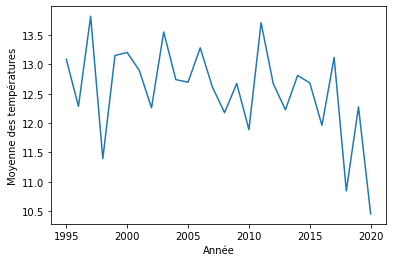

In [48]:
plt.plot(temp_france['AvgTemperature'])
plt.xlabel('Année')
plt.ylabel('Moyenne des températures')
plt.show()

In [49]:
# Export en CSV
temp_france.to_csv(CURATED_PATH + 'requete1.csv')

## 2. L'évolution moyenne de la témparature chaque mois de l'année (sur toutes les années donc) de chaque région du globe (à l'aide de subplots, soit plusieurs diagramme sur un seul affichage)

## 3. Le classement graphique des pays les plus chauds au monde

## 4. Le classement graphique des pays les plus froids au monde

## 5. L'évolution des températures entre le pays le plus chaud et le pays le plus froid de 1995 à 2019 sur un même graphique

## 6. L'évolution de la température moyenne de la ville de Paris.

## 7. La température moyenne de chaque pays sur une carte sur la période 2010-2019